In [ ]:
#import essential libraries for data handling, visualization, and machine learning to analyze and predict survival in the Titanic dataset.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Load the Titanic dataset from a CSV file into a DataFrame to begin data analysis and machine learning preparation.

In [8]:
data = pd.read_csv(r"C:\Users\LENOVO T450S\OneDrive\Desktop\titanic.csv")

In [ ]:
#Clean and prepare the Titanic dataset by handling missing values, encoding categories, and formatting data for accurate model training.

In [19]:
import pandas as pd

data.columns = data.columns.str.strip()

if 'Age' in data.columns:
    data['Age'] = data['Age'].fillna(data['Age'].median())

if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

for col in ['Name', 'Ticket', 'Cabin']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

categorical_cols = []
if 'Sex' in data.columns:
    categorical_cols.append('Sex')
if 'Embarked' in data.columns:
    categorical_cols.append('Embarked')

if categorical_cols:
    data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [ ]:
#Divide the dataset into training and testing sets to evaluate model performance and ensure it generalizes well to unseen data.

In [10]:
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Select and assign a machine learning model to learn patterns from the training data and predict Titanic passenger survival.

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#Assess the model’s performance using metrics like accuracy, precision, and recall to determine how well it predicts survival outcomes.

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [15]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

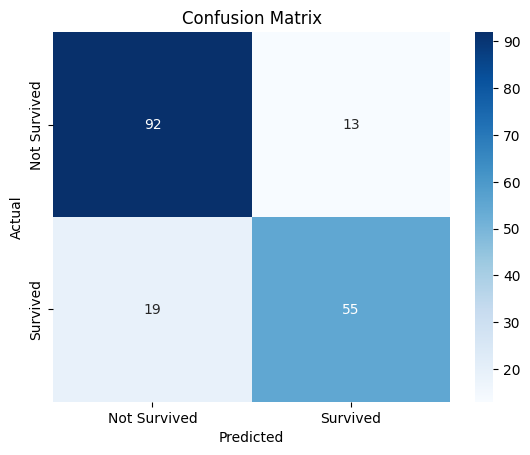

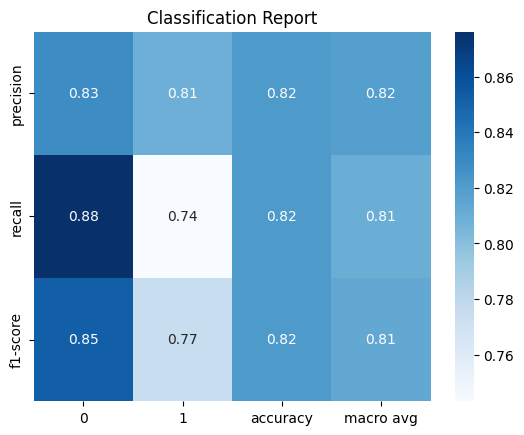

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()
print(classification_report(y_test, y_pred))
